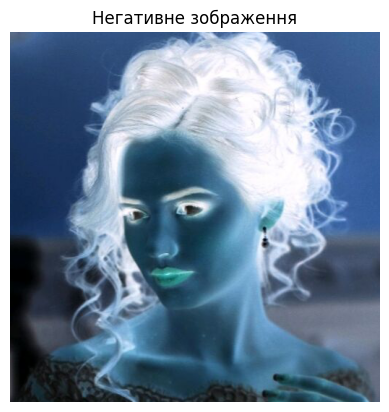

Час відновлення: 0.016038 секунд


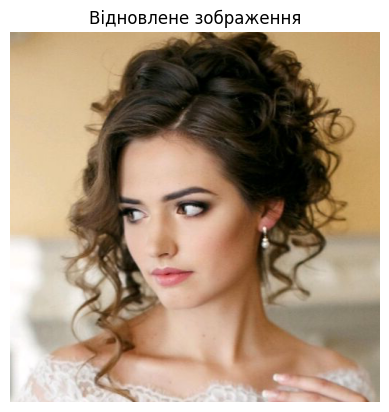

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

def get_minor(matrix, i, j):
    return [row[:j] + row[j+1:] for k, row in enumerate(matrix) if k != i]

def determinant(matrix):
    n = len(matrix)
    if n == 1:
        return matrix[0][0]
    if n == 2:
        return matrix[0][0]*matrix[1][1] - matrix[0][1]*matrix[1][0]

    det = 0
    for j in range(n):
        sign = (-1) ** j
        det += sign * matrix[0][j] * determinant(get_minor(matrix, 0, j))
    return det

def cofactor_matrix(matrix):
    n = len(matrix)
    cofactors = []
    for i in range(n):
        row = []
        for j in range(n):
            minor = get_minor(matrix, i, j)
            sign = (-1) ** (i + j)
            cofactor = sign * determinant(minor)
            row.append(cofactor)
        cofactors.append(row)
    return cofactors

def transpose(matrix):
    return [list(row) for row in zip(*matrix)]

def adjugate_matrix(matrix):
    return transpose(cofactor_matrix(matrix))

def invert_matrix(matrix):
    det = determinant(matrix)
    if det == 0:
        raise ValueError("Zero determinant")
    adj = adjugate_matrix(matrix)
    inverse = [[elem / det for elem in row] for row in adj]
    return inverse

def restore_image(negative_img):
    img = negative_img.astype(np.float32)

    h, w, _ = img.shape
    ones = np.ones((h, w, 1), dtype=np.float32)
    img_homogeneous = np.concatenate((img, ones), axis=2)

    img_reshaped = img_homogeneous.reshape(-1, 4).T
    restored = np.matmul(T_inv, img_reshaped)

    restored = restored[:3, :].T.reshape(h, w, 3)
    restored = np.clip(restored, 0, 255).astype(np.uint8)

    return restored

def show_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

T = [
    [-1, 0, 0, 255],
    [0, -1, 0, 255],
    [0, 0, -1, 255],
    [0, 0, 0, 1]
]

T_inv = invert_matrix(T)
T_inv = np.array(T_inv)

input_path = 'negative_image.png'
negative_img = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

if negative_img is None:
    print("Помилка: не вдалося завантажити зображення.")
else:
    if negative_img.shape[2] == 4:
        negative_img = negative_img[:, :, :3]

    show_image(negative_img, "Негативне зображення")

    start_time = time.time()
    restored_img = restore_image(negative_img)
    end_time = time.time()

    print(f"Час відновлення: {end_time - start_time:.6f} секунд")

    show_image(restored_img, "Recovered image")

    output_path = 'restored_image.png'
    cv2.imwrite(output_path, restored_img)
